In [1]:
from pythonping import ping
import pandas as pd
import time, os
import seaborn as sns

In [3]:
# User defines webpage and interval
url = input("Bitte geben Sie die URL ein: ")
interval = int(input("Wie lange soll das Intervall der Abfragen sein (in Sekunden)? "))
file_name = "ping_test.csv"
direc = "Data"
file_path = direc+"/"+file_name

Bitte geben Sie die URL ein: www.google.com
Wie lange soll das Intervall der Abfragen sein (in Sekunden)? 5


In [4]:
if not "ping_test.csv" in os.listdir("./"+direc):
    df_my_ping = pd.DataFrame(columns=["date", "min", "max", "avg", "url"])
else:
    df_my_ping = pd.read_csv(file_path, index_col=0)

In [34]:
def get_ping_as_df(url):
    my_ping = ping(url)
    return pd.DataFrame({"date":[time.strftime("%d.%m.%Y %H:%M:%S",time.localtime())],
                        "min":[my_ping.rtt_min_ms],
                        "max": [my_ping.rtt_max_ms],
                        "avg":[my_ping.rtt_avg_ms],
                        "url":[url]})

In [53]:
# Execution of infinit loop and catch if keyboard interrupts --> afterwarts persistent storage as csv
try:
    while True:
        df_my_ping = df_my_ping.append(get_ping_as_df(url), ignore_index=True)
        if int(time.strftime("%M", time.localtime()))%10 == 0:
            df_my_ping.to_csv(file_path)
        time.sleep(interval)
except KeyboardInterrupt:
    print("Keyboard interrupt - saving files to ping_test.csv.")
    df_my_ping.to_csv(file_path)
            

Keyboard interrupt - saving files to ping_test.csv.


In [5]:
# Transform all dates to datetime format
df_my_ping["date"] = pd.to_datetime(df_my_ping["date"])

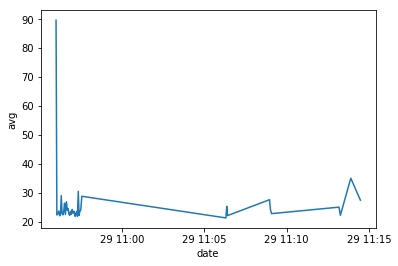

In [6]:
sns.lineplot(x=df_my_ping["date"], y=df_my_ping["avg"])

In [10]:
df_my_ping.groupby(df_my_ping.date.dt.minute).mean()

,min,max,avg
date,,,
6,21.426667,24.853333,22.893333
8,21.710000,31.160000,27.590000
9,21.725000,25.955000,23.520000
13,23.746667,30.786667,27.403333
14,21.860000,31.980000,27.420000
56,21.571500,32.892500,26.984500
57,22.130909,26.587273,24.126364
